## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import statsmodels.api as sm

%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv('ab_data.csv')

In [3]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [5]:
len(df['user_id'].unique())

290584

d. The proportion of users converted.

In [6]:
df['converted'].mean()

0.11965919355605512

The proportion of users converted = 0.1197

e. The number of times the `new_page` and `treatment` don't match.

In [7]:
notmatch=df[((df['landing_page']=='new_page')==(df['group']=='treatment'))==False]

print("The number of times the new_page and treatment don't match is "+ str(notmatch.shape[0]))

The number of times the new_page and treatment don't match is 3893


f. Do any of the rows have missing values?

In [8]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

no missing values

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
df2 = df.drop(notmatch.index)

drop the not matched value we do from

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


df2's unique user_ids = 290585

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2[df2.duplicated(['user_id'],False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


row 1899 and 2893 has duplicated user_id

c. What is the row information for the repeat **user_id**? 

We already get teh info for duplucated user_id in question b, here are the repeate user_id information again:

In [13]:
df2[df2.duplicated(['user_id'],False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

I drop the old record instead of the new record. 

In [14]:
df2=df2.drop([0,1899])

Check if the drop row is successful:

In [15]:
df2.loc[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


The row 1899 deleted sucessfull.

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
df['converted'].mean()

0.11965919355605512

Use mean to calculated the probability, the probability of an individual converting regardless of the page they receive is 11.97%.

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
controlgroup = df2.groupby('group')
controlgroup.describe()

converted                                                user_id  \
              count      mean       std  min  25%  50%  75%  max     count   
group                                                                        
control    145273.0  0.120387  0.325415  0.0  0.0  0.0  0.0  1.0  145273.0   
treatment  145310.0  0.118808  0.323564  0.0  0.0  0.0  0.0  1.0  145310.0   

                                                                       \
                    mean           std       min        25%       50%   
group                                                                   
control    788163.639341  91288.079439  630002.0  709279.00  788127.0   
treatment  787845.719290  91161.564429  630000.0  708745.75  787876.0   

                                
                 75%       max  
group                           
control    867209.00  945998.0  
treatment  866718.75  945999.0

Since we need get individual probability in groups, we can just groupby groups and use describe to get the basic statics calculation.

It show control group's probability is 0.1203=12.03%.

c. Given that an individual was in the `treatment` group, what is the probability they converted?

We already get the answer for c in question b.

It show treatement group's probability is 0.1188=11.88%.

d. What is the probability that an individual received the new page?

In [18]:
newpage=df2[(df2['landing_page']=='new_page')].describe()

In [19]:
df2.describe()

,user_id,converted
count,290583.000000,290583.000000
mean,788004.659075,0.119597
std,91224.817337,0.324491
min,630000.000000,0.000000
25%,709034.500000,0.000000
50%,787995.000000,0.000000
75%,866956.500000,0.000000
max,945999.000000,1.000000


There are 145310 indivdual received new page, and we divided the count of the df2 can get probability that individual received the new page as below:

In [20]:
print( "The probability that an individual received the new page "+str(145310/290583))

The probability that an individual received the new page 0.5000636651146144


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

Since we get 12.03% for control groups and 11.88% for treatment group, we can find the original one has better performance.However, the difference of the control group and treatment group is tinny. We cannot use this as evidence that the new treatment page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**$H_{0}$**:  **$p_{old}$** - **$p_{new}$** >= 0

**$H_{1}$**:  **$p_{old}$** - **$p_{new}$** < 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [21]:
pnew=df2['converted'].mean()
print("The conversion rate for Pnew under the null is " + str(pnew))

The conversion rate for Pnew under the null is 0.119597498821


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [22]:
pold=df2['converted'].mean()
print("The conversion rate for Pold under the null is " + str(pnew))

The conversion rate for Pold under the null is 0.119597498821


c. What is $n_{new}$, the number of individuals in the treatment group?

In [23]:
nnew=len(df2.query("group=='treatment'"))
print("The number of individuals in the treatment group is "+ str(nnew))

The number of individuals in the treatment group is 145310


d. What is $n_{old}$, the number of individuals in the control group?

In [24]:
nold=len(df2.query("group=='control'"))
print("The number of individuals in the control group is "+ str(nold))

The number of individuals in the control group is 145273


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
new_page_converted=np.random.choice([1,0],size=nnew,p=[pnew,(1-pnew)])
print(len(new_page_converted))

145310


f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
old_page_converted=np.random.choice([1,0],size=nold,p=[pold,(1-pold)])
print(len(old_page_converted))

145273


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

Since the the values from e and f are different, we use mean to simulated the  $p_{new}$ - $p_{old}$

In [27]:
pdifference=new_page_converted.mean()-old_page_converted.mean()
print(pdifference)

-0.00186824162118


h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [28]:
p_diffs=[]

for _ in range(10000):
    new_page_converted=np.random.choice([1,0],size=nnew,p=[pnew,(1-pnew)])
    old_page_converted=np.random.choice([1,0],size=nold,p=[pold,(1-pold)])
    pdifference=new_page_converted.mean()-old_page_converted.mean()  
    p_diffs.append(pdifference)

In [29]:
p_diffs=np.array(p_diffs)
print("Here are 10000 values in the p_diffs array" + str(p_diffs))

Here are 10000 values in the p_diffs array[-0.00018188 -0.00115226 -0.00089086 ..., -0.00173728  0.00071959
  0.00020372]


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([   12.,   107.,   640.,  1726.,  2982.,  2655.,  1390.,   417.,
           59.,    12.]),
 array([-0.00458685, -0.00364596, -0.00270506, -0.00176417, -0.00082328,
         0.00011762,  0.00105851,  0.00199941,  0.0029403 ,  0.0038812 ,
         0.00482209]),
 <a list of 10 Patch objects>)

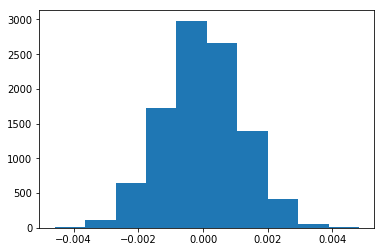

In [30]:
plt.hist(p_diffs)

It shows normal distribution and it follows the central limit theorem, because it's sample size is 10000, which is a large enough sample size follow by the CLT. 

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [31]:
converted_treatment=df2.query("group == 'treatment'")['converted'].mean()
converted_control=df2.query("group == 'control'")['converted'].mean()
actual_diff=converted_treatment-converted_control
print("The observed difference in converted rate is "+ str(actual_diff))

The observed difference in converted rate is -0.00157906767551


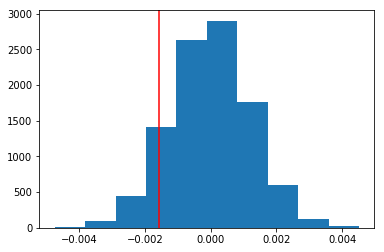

In [32]:
#distribution of the null hypothesis
nullvalue= np.random.normal(0, p_diffs.std(), 10000)

#plot actual difference on the nullvalue
plt.hist(nullvalue)
plt.axvline(actual_diff, color='red' )
plt.show()

In [33]:
(nullvalue > actual_diff).mean()

0.9032

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

0.91 we get in j is p-value. The p-value is really high. A p-value higher than 0.05 (> 0.05) is not statistically significant and indicates strong evidence for the null hypothesis(https://www.simplypsychology.org). In this way, we fail to reject the null hypothesis.This means new pages does not do better than the old pages.  

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [34]:
import statsmodels.api as sm

convert_old =sum(df2.query("group == 'control'")['converted'])
convert_new =sum(df2.query("group == 'treatment'")['converted'])
n_old = len(df2.query("group =='control'"))
n_new = len(df2.query("group =='treatment'"))

print("Convert rate for old page is " +str(convert_old))
print("Convert rate for new page is " +str(convert_new))
print("Old pages's row number " +str(n_old))
print("New pages' row number " +str(n_new))


Convert rate for old page is 17489
Convert rate for new page is 17264
Old pages's row number 145273
New pages' row number 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [35]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print("z_score is "+str(z_score))
print("p_value is "+str(p_value))

z_score is 1.31160832119
p_value is 0.905173838025


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**


The z_score and p_value in m we get confirm the findings in j and k.The p_value we get is larger than 0.5, means fail to reject the null hypothesis. In this way, we confirm the previous finding that new pages does not do better than the old pages.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

We should use logistic regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [36]:
df2['ab_page']=pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [37]:
df2['intercept']=1
logit_mod=sm.Logit(df2['converted'],df2[['intercept','ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [38]:
#I get error (AttributeError: module 'scipy.stats' has no attribute 'chisqprob' )
# when I try to use the summary(), and as people suggested on  stack over flow, 
#I try summary2(), it works.

results=logit_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366119
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-02-05 21:17 AIC:              212780.0937
No. Observations:   290583           BIC:              212801.2529
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6679  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3116  0.1897  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Put your answer here.**

**$H_{0}$**:  **$p_{old}$** - **$p_{new}$** = 0

**$H_{0}$**:  **$p_{old}$** - **$p_{new}$** != 0

This part proves similar result of the second part. However the hypothesis are different. I put the hypothesis above. Here, we compare the conversion rate between new page and old pag, and the p_value=0.19 means fail to reject null hypothesis. 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**

The current hypothesis we get is depends on single factor, we should considering other factors. The disadvantages I can think of is adding factors will change the coefficient.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [39]:
df_countries=pd.read_csv('countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [40]:
df_newcountry=df_countries.set_index('user_id').join(df2.set_index('user_id'),how='inner')
df_newcountry.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [41]:
#check the country 
df_newcountry.groupby('country')['country'].count()

country
CA     14499
UK     72466
US    203618
Name: country, dtype: int64

In [42]:
#add three dummies

df_newcountry[['CA','UK','US']]=pd.get_dummies(df_newcountry['country'])
df_newcountry.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [43]:
logit_mod2=sm.Logit(df_newcountry['converted'],df_newcountry[['intercept','ab_page','US','UK']])
results2=logit_mod2.fit()
results2.summary2()

Optimization terminated successfully.
         Current function value: 0.366114
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-02-05 21:17 AIC:              212780.8689
No. Observations:   290583           BIC:              212823.1875
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290579           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2486  0.0000  -2.0822  -1.9778
ab_page       -0.0150    0.0114   -1.3076  0.1910  -0.0374   0.0075
US             0.0408    0.0269    1.5163  0.1294  -0.0119   0.0935
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
==================================================================

"""

In [44]:
#exp to interprete the result
np.exp(results2.params)

intercept    0.131332
ab_page      0.985160
US           1.041605
UK           1.051944
dtype: float64

Base on the p-value we get in part g, it does not shows country have any significant 
impact for the result. 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [50]:
#creat new intereacton variable betten ab_page, US and UK
df_newcountry['newpage_us']=df_newcountry['ab_page'] * df_newcountry['US']
df_newcountry['newpage_uk']=df_newcountry['ab_page'] * df_newcountry['UK']

#create the logistic regression for the intereaction variable between new page and new country using dummy
logit_mod3=sm.Logit(df_newcountry['converted'],df_newcountry[['intercept','ab_page','newpage_us','newpage_uk']])
results3=logit_mod3.fit()
results3.summary2()

Optimization terminated successfully.
         Current function value: 0.366110
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-02-05 21:35 AIC:              212778.6817
No. Observations:   290583           BIC:              212821.0003
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290579           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6679  0.0000  -2.0046  -1.9730
ab_page      -0.0827    0.0380    -2.1765  0.0295  -0.1571  -0.0082
newpage_us    0.0644    0.0384     1.6788  0.0932  -0.0108   0.1396
newpage_uk    0.0901    0.0405     2.2252  0.0261   0.0107   0.1694
==================================================================

"""

In [51]:
#exp to in terprete the result
np.exp(results3.params)

intercept     0.136864
ab_page       0.920642
newpage_us    1.066532
newpage_uk    1.094247
dtype: float64

Base on the summary we get in part h, we can found the newpage us and uk has a tiny increase, however it does not shows country have any statistically significant impact for the result,beacause of large p-value.

Conclusion:

We have try ab testing and logistic regression, we failed to regiect both null hypothesis.We try to add additional factor in the last part of the project, however the country does not effect a lot. Since Canada is baseline, we knew US are 1.06 times Canada,UK are 1.09 times to Canada.However, the p value is still large, so that country is not statistically significant in the testing,and does not have much practical significant.In this way, we can still use the old page, and we do not have any reason to use the new page.

From all the testing we did in this report show the old page is better than the new one, although the difference is tiny. All the testing are based on the current dataset.There should be some limitation due to the dataset size and quality. If we wanna get further result,we should gathering more high quality data.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [62]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0

reference:

https://www.ipl.org/essay/Disadvantages-Of-Multiple-Regression-FJ6UQ8ZY2R

https://www.researchgate.net/post/Why-should-be-consider-multiple-regression-model

https://stackoverflow.com/questions/49814258/statsmodel-attributeerror-module-scipy-stats-has-no-attribute-chisqprob

https://www.researchgate.net/post/Why_in_regression_analysis_the_inclusion_of_a_new_variable_makes_other_variables_that_previously_were_not_statistically_significant2

https://stackoverflow.com/questions/61560569/simple-logistic-regression-with-statsmodels-adding-an-intercept-and-visualizing

https://medium.com/@rana96prateek/a-b-hypothesis-testing-regression-analysis-f85c185368f2

https://github.com/shravankoninti?tab=repositories

https://stats.stackexchange.com/questions/52067/does-adding-more-variables-into-a-multivariable-regression-change-coefficients-o

https://stats.stackexchange.com/questions/254254/why-do-we-need-multivariate-regression-as-opposed-to-a-bunch-of-univariate-regr

https://github.com/MarwaQabeel?tab=repositories
https://verascity.github.io/ab_test.html

